### Caeden Kropf
### College Attendance Project
### 12/12/25

In [3]:
import requests
from bs4 import BeautifulSoup
import time, random
import pandas as pd
import time, random
import re
from IPython.display import HTML
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
from json import loads
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import os
from PIL import Image
from scipy.stats import pearsonr

### Question 1 Does team success drive higher attendance?

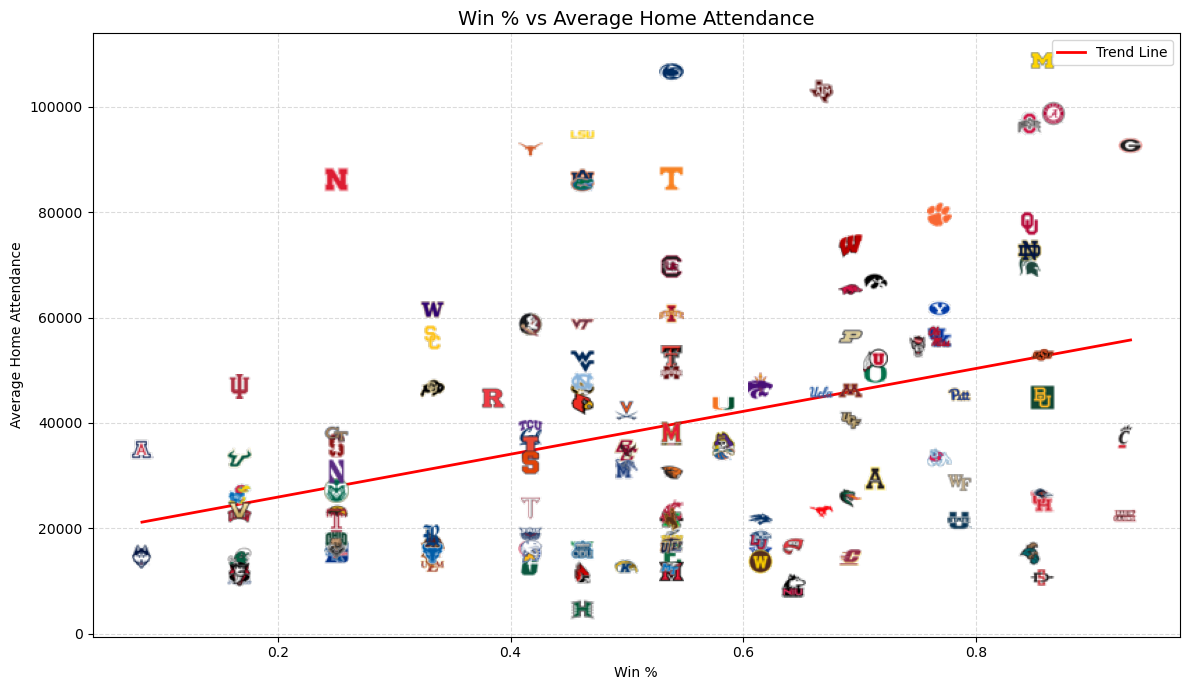

In [10]:
#Loads Data
df = pd.read_csv("final_college_cleaned.csv")
df_plot = df.dropna(subset=["win_pct", "avg_home_attendance", "logo_id"])

#Gets logos from 'logos' file
logo_path = "logos"

plt.figure(figsize=(12, 7))

#Invisible scatter anchor for axes scaling
plt.scatter(df_plot["win_pct"], df_plot["avg_home_attendance"], alpha=0)

#Adds logos
for _, row in df_plot.iterrows():
    logo_file = f"{row['logo_id']}.png"
    full_path = os.path.join(logo_path, logo_file)

    if os.path.exists(full_path):
        img = Image.open(full_path).convert("RGBA")
        img = img.resize((18, 18))    # small logo size

        imagebox = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(
            imagebox,
            (row["win_pct"], row["avg_home_attendance"]),
            frameon=False,
            pad=0.15
        )
        plt.gca().add_artist(ab)

#Adds Trend Line
x = df_plot["win_pct"]
y = df_plot["avg_home_attendance"]

m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 500)

#Plots figure
plt.plot(x_line, m*x_line + b, color="red", linewidth=2, label="Trend Line")
plt.legend()
plt.title("Win % vs Average Home Attendance", fontsize=14)
plt.xlabel("Win %")
plt.ylabel("Average Home Attendance")
plt.grid(True, linestyle="--", alpha=0.45)

plt.tight_layout()
plt.show()

In [14]:
#Calculates Correlation and p-value
r, p = pearsonr(df_plot["win_pct"], df_plot["avg_home_attendance"])
print(r, p)

0.3455434314464051 7.921509206595293e-05


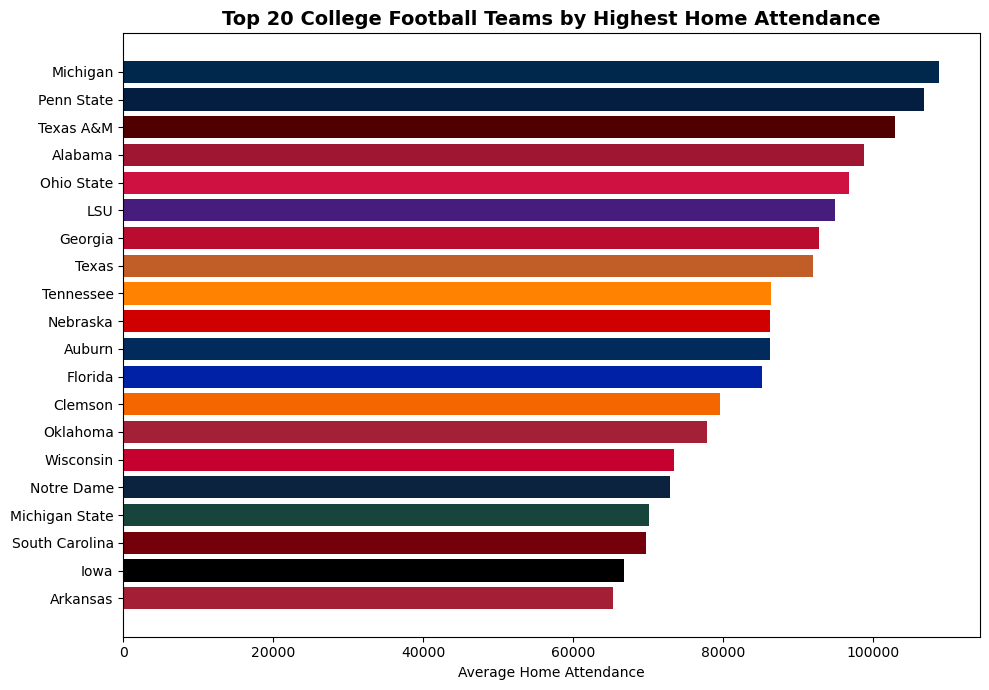

In [4]:
#Loads data
df = pd.read_csv("final_college_cleaned.csv")

#Sorts for better visuals
top = df.sort_values("avg_home_attendance", ascending=False).head(20)

#Creates the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(
    top["team_name"],
    top["avg_home_attendance"],
    color=top["color"]
)

#Adds Labeling
ax.set_xlabel("Average Home Attendance")
ax.set_title("Top 20 College Football Teams by Highest Home Attendance", fontsize=14, weight="bold")
plt.gca().invert_yaxis()  # highest at top

plt.tight_layout()
plt.show()

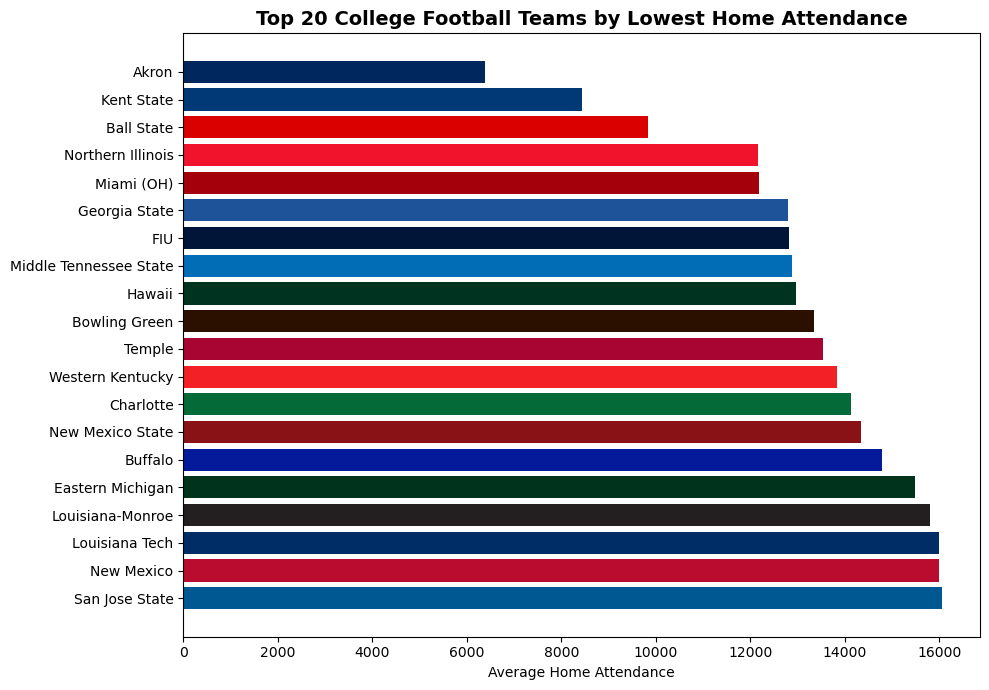

In [6]:
#Loads data
df = pd.read_csv("final_college_cleaned.csv")

#Sorts for better visuals
top = df.sort_values("avg_home_attendance", ascending=True).head(20)

#Creates the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(
    top["team_name"],
    top["avg_home_attendance"],
    color=top["Color"]
)

#Adds Labeling
ax.set_xlabel("Average Home Attendance")
ax.set_title("Top 20 College Football Teams by Lowest Home Attendance", fontsize=14, weight="bold")
plt.gca().invert_yaxis()  # highest at top

plt.tight_layout()
plt.show()

### Question 2 Do larger universities draw bigger crowds?

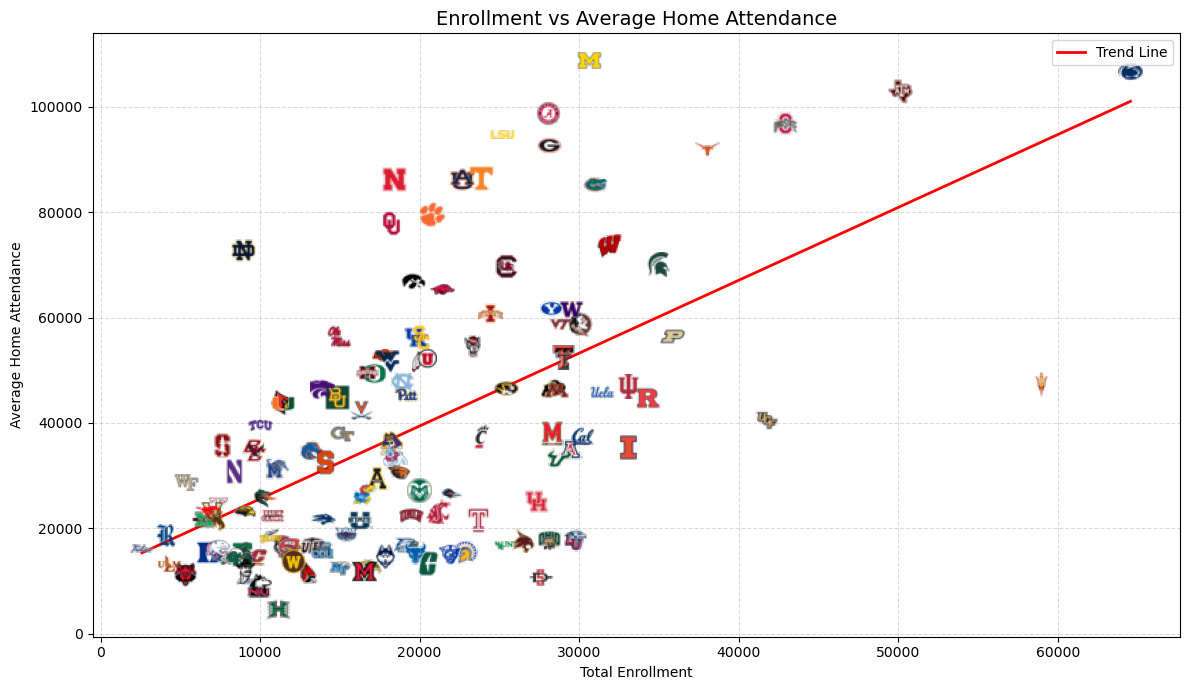

In [20]:
#Loads Data
df = pd.read_csv("final_college_cleaned.csv")
df_plot = df.dropna(subset=["enrollment_total", "avg_home_attendance", "logo_id"])

#Gets logos from 'logos' folder
logo_path = "logos"

plt.figure(figsize=(12, 7))

#Invisible scatter anchor for axes scaling
plt.scatter(df_plot["enrollment_total"], df_plot["avg_home_attendance"], alpha=0)

#Adds logos
for _, row in df_plot.iterrows():
    logo_file = f"{row['logo_id']}.png" #Gets logo id from dataset and goes to the 'logos' and finds matching png
    full_path = os.path.join(logo_path, logo_file)

    if os.path.exists(full_path):
        img = Image.open(full_path).convert("RGBA")
        img = img.resize((18, 18))    # small logo size

        imagebox = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(
            imagebox,
            (row["enrollment_total"], row["avg_home_attendance"]),
            frameon=False,
            pad=0.15
        )
        plt.gca().add_artist(ab)

#Adds Trend Line
x = df_plot["enrollment_total"]
y = df_plot["avg_home_attendance"]

m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 500)

#Plots figure
plt.plot(x_line, m*x_line + b, color="red", linewidth=2, label="Trend Line")
plt.legend()
plt.title("Enrollment vs Average Home Attendance", fontsize=14)
plt.xlabel("Total Enrollment")
plt.ylabel("Average Home Attendance")
plt.grid(True, linestyle="--", alpha=0.45)

plt.tight_layout()
plt.show()


In [24]:
#Calculates correlation and p-value
r, p = pearsonr(df_plot["enrollment_total"], df_plot["avg_home_attendance"])
print(r, p)

0.5853176773135655 7.567246165459269e-13


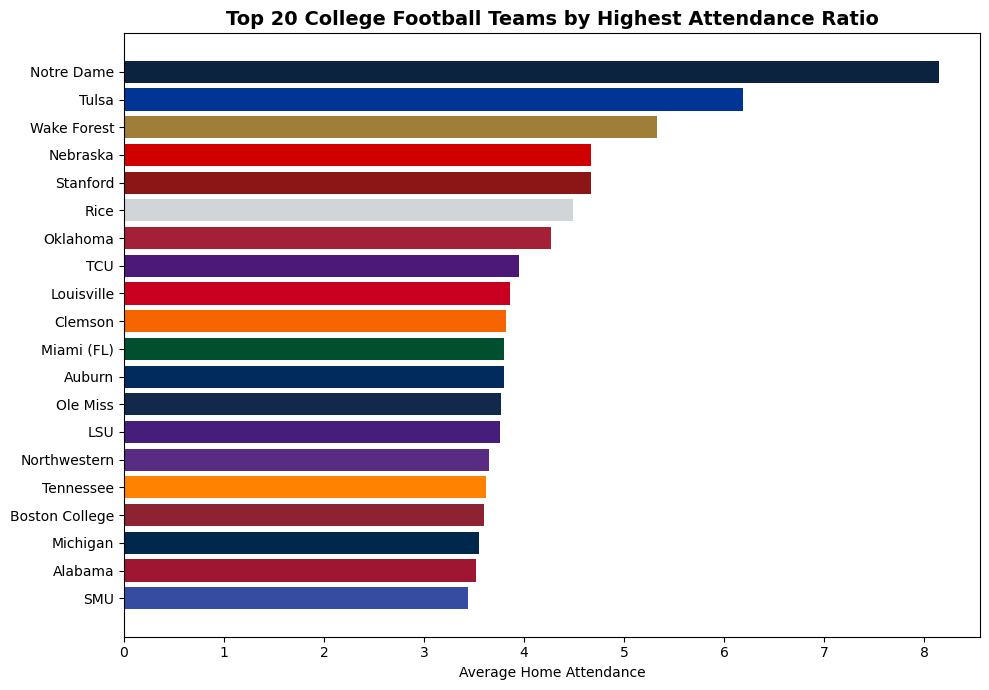

In [37]:
#Sorts for better visuals
top = df.sort_values("attendance_ratio", ascending=False).head(20)

#Creates the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(
    top["team_name"],
    top["attendance_ratio"],
    color=top["color"]
)

#Adds Labeling
ax.set_xlabel("Average Home Attendance")
ax.set_title("Top 20 College Football Teams by Highest Attendance Ratio", fontsize=14, weight="bold")
plt.gca().invert_yaxis()  # highest at top

plt.tight_layout()
plt.show()

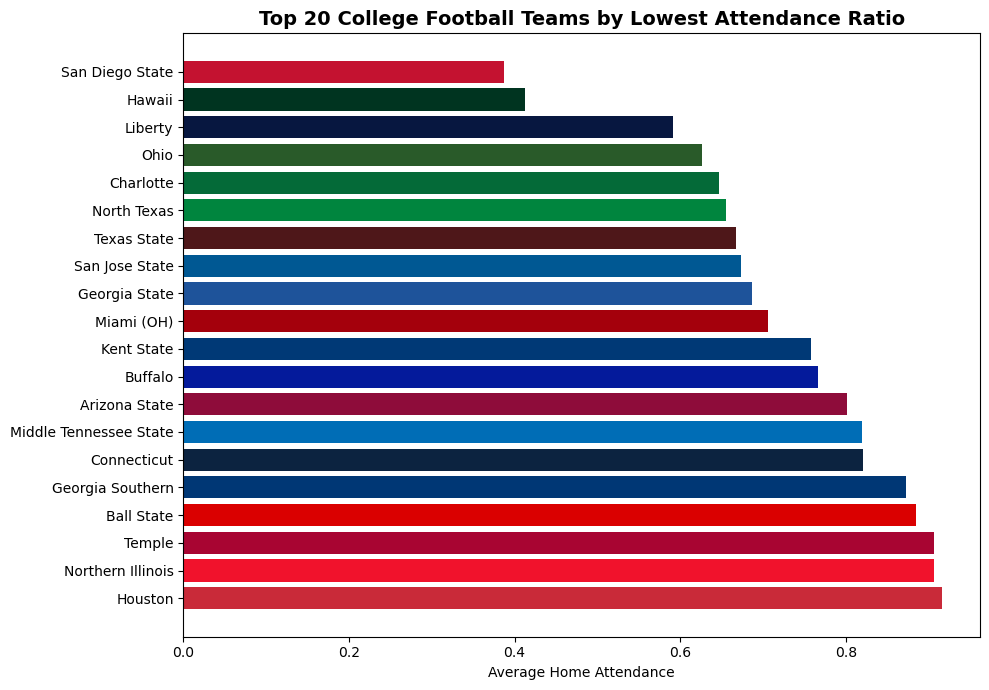

In [39]:
#Sorts for better visuals
top = df.sort_values("attendance_ratio", ascending=True).head(20)

#Creates the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(
    top["team_name"],
    top["attendance_ratio"],
    color=top["color"]
)

#Adds Labeling
ax.set_xlabel("Average Home Attendance")
ax.set_title("Top 20 College Football Teams by Lowest Attendance Ratio", fontsize=14, weight="bold")
plt.gca().invert_yaxis()  # highest at top

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

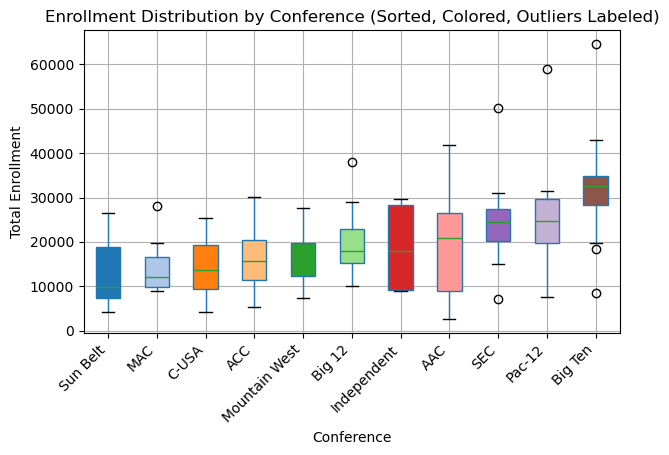

In [53]:
#Loads data
df_sorted = pd.read_csv("final_college_cleaned.csv")

#Sorts conferences by median enrollment
median_sorted = (
    df.groupby("conference")["enrollment_total"]
      .median()
      .sort_values()
      .index
)

df_sorted = df.copy()
df_sorted["conference"] = pd.Categorical(df_sorted["conference"], categories=median_sorted, ordered=True)
df_sorted = df_sorted.sort_values("conference")

#Assigns unique colors per conference
conferences = df_sorted["conference"].cat.categories
colors = dict(zip(conferences, range(len(conferences))))  # numeric colors

#Plots figure
plt.figure(figsize=(14, 6))
box = df_sorted.boxplot(
    column="enrollment_total",
    by="conference",
    patch_artist=True,
    return_type="dict"
)

#Applies colors
for patch, conf in zip(box["enrollment_total"]["boxes"], conferences):
    patch.set_facecolor(plt.cm.tab20(colors[conf]))  # uses colormap automatically

plt.title("Enrollment Distribution by Conference (Sorted, Colored, Outliers Labeled)")
plt.suptitle("")
plt.xlabel("Conference")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

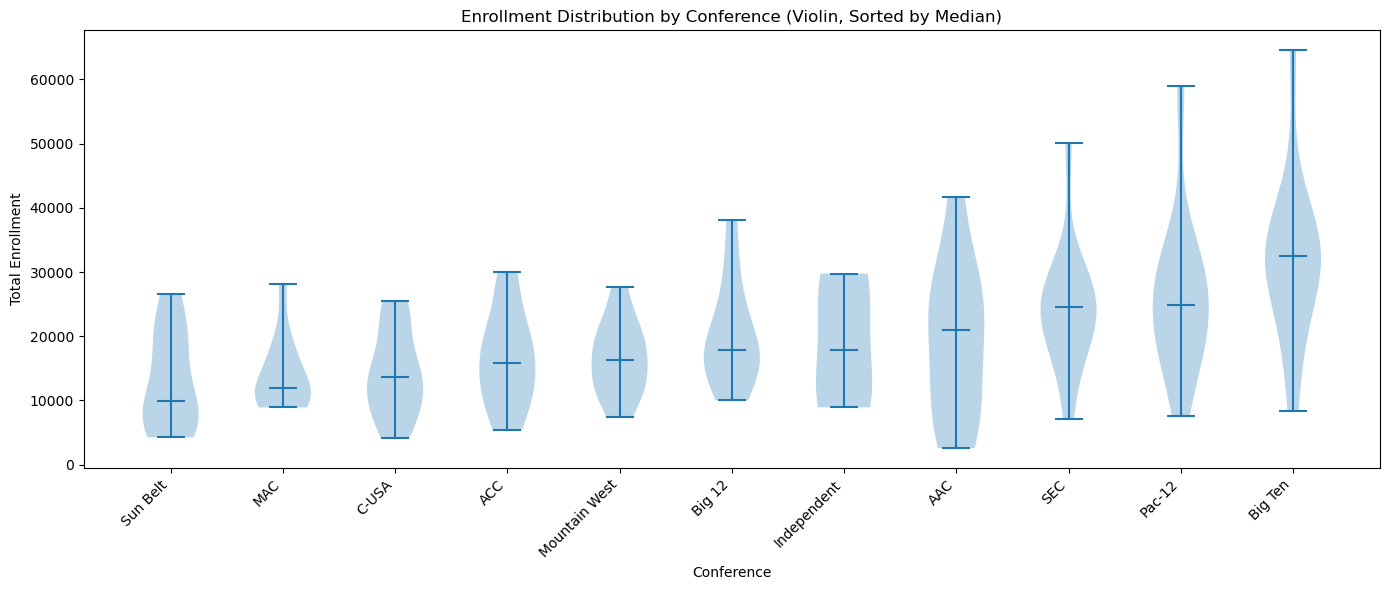

In [55]:
#Loads data
df = pd.read_csv('final_college_cleaned.csv')

#Sorts conferences by median enrollment
median_sorted = (
    df.groupby("conference")["enrollment_total"]
      .median()
      .sort_values()
      .index
)

df_sorted = df.copy()
df_sorted["conference"] = pd.Categorical(
    df_sorted["conference"],
    categories=median_sorted,
    ordered=True
)

df_sorted = df_sorted.sort_values("conference")

#Makes Violin Plot
plt.figure(figsize=(14, 6))

plt.violinplot(
    [df_sorted[df_sorted["conference"] == conf]["enrollment_total"] for conf in median_sorted],
    showmeans=False,
    showmedians=True,
    showextrema=True
)

plt.xticks(ticks=range(1, len(median_sorted) + 1), labels=median_sorted, rotation=45, ha="right")
plt.title("Enrollment Distribution by Conference (Violin, Sorted by Median)")
plt.xlabel("Conference")
plt.ylabel("Total Enrollment")
plt.tight_layout()
plt.show()


### Question 3 Do certain conferences or regions consistently lead in attendance?

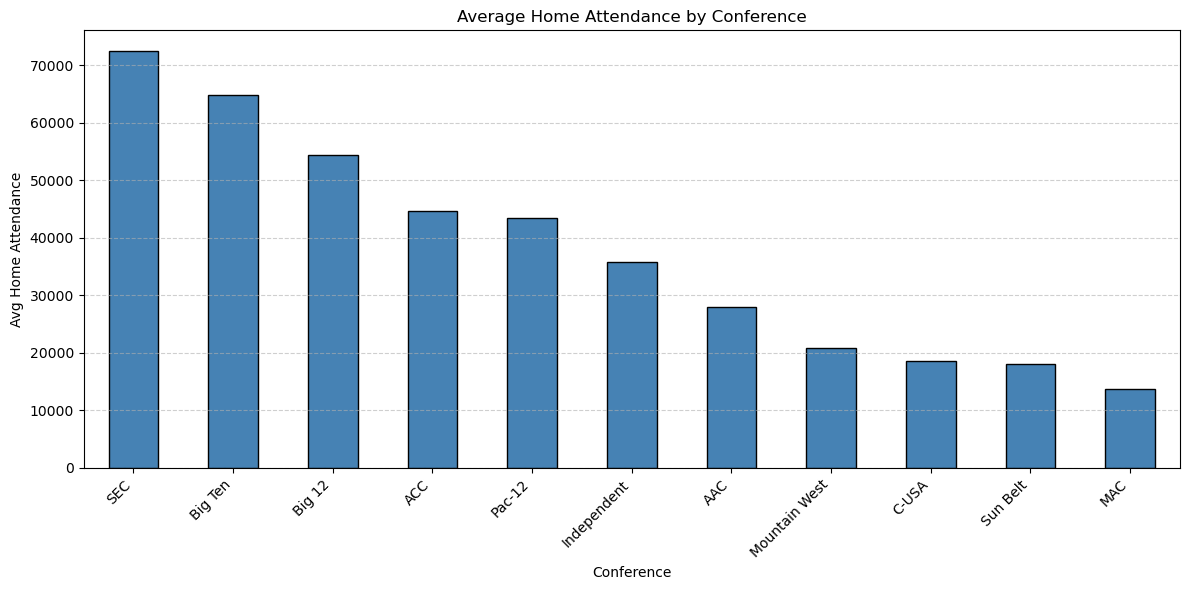

In [20]:
#Loads Data
df = pd.read_csv("final_college_cleaned.csv")

#Groups by conference and gets average attendance
conference_attendance = df.groupby("conference")["avg_home_attendance"].mean().sort_values(ascending=False)

#Plots figure
plt.figure(figsize=(12,6))
conference_attendance.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Average Home Attendance by Conference")
plt.ylabel("Avg Home Attendance")
plt.xlabel("Conference")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
#Loads Data
df = pd.read_csv("final_college_cleaned.csv")

#Groups by conference and computes average attendance
p5_attendance = (
    df.groupby("conference")["avg_home_attendance"]
         .mean()
         .sort_values(ascending=False)
)

print(p5_attendance)

conference
SEC              72437.357143
Big Ten          64785.071429
Big 12           54447.300000
ACC              44571.642857
Pac-12           43364.416667
Independent      35720.600000
AAC              27894.500000
Mountain West    20832.272727
C-USA            18546.923077
Sun Belt         18088.600000
MAC              13745.833333
Name: avg_home_attendance, dtype: float64


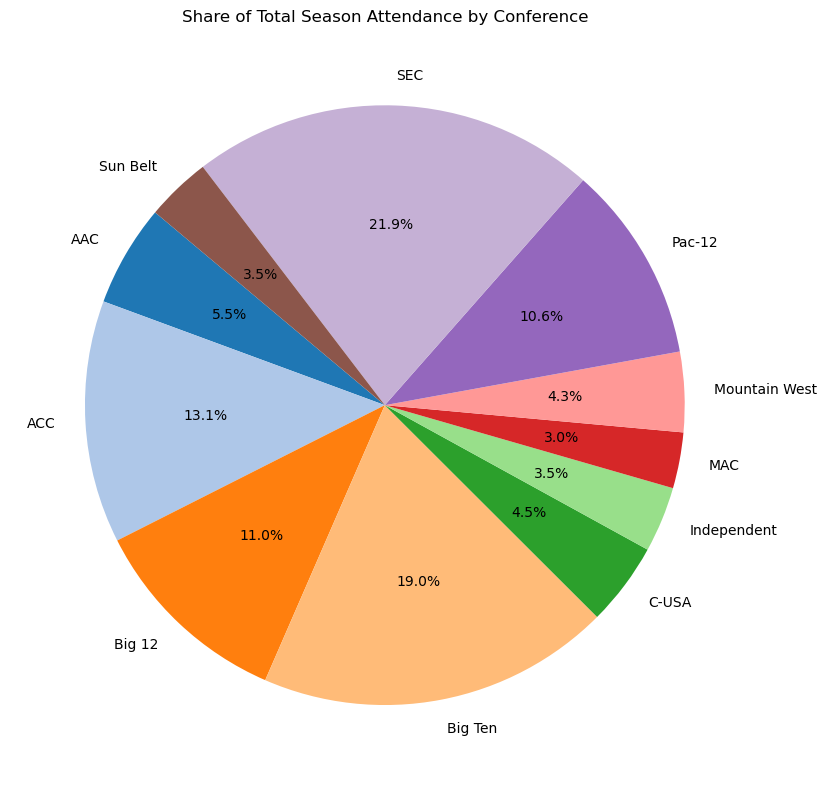

In [6]:
#Loads data
df = pd.read_csv('final_college_cleaned.csv')

#Calculates total season attendance per school
df["total_attendance"] = df["avg_home_attendance"] * df["num_home_games"]

#Sums attendance by conference
attendance_by_conf = df.groupby("conference")["total_attendance"].sum()

#Usez a colormap with many distinct colors
colors = plt.cm.tab20(range(len(attendance_by_conf)))

#Makes Pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    attendance_by_conf,
    labels=attendance_by_conf.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Share of Total Season Attendance by Conference")
plt.tight_layout()
plt.show()


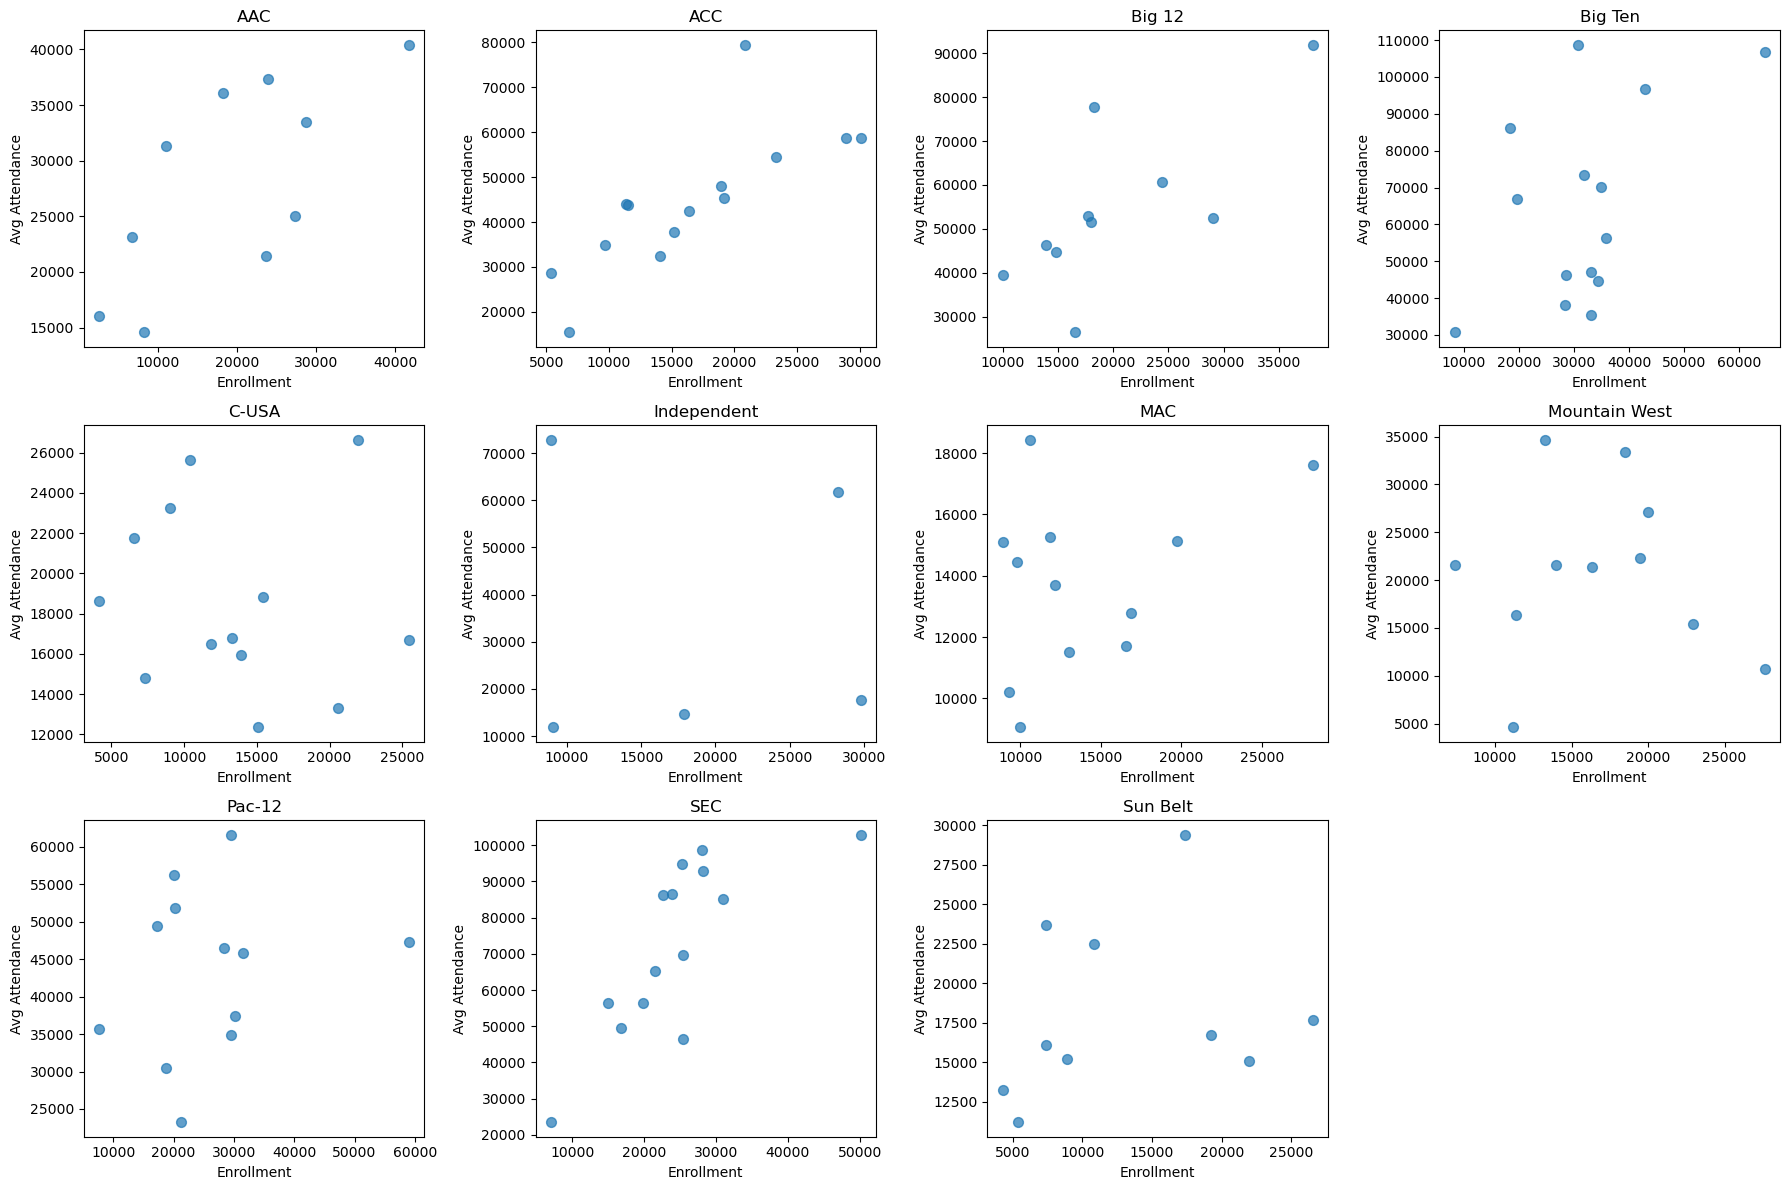

In [12]:
#Loads data
df = pd.read_csv('final_college_cleaned.csv')

#Gets the number of figures from the numbers of unique conferences
conferences = sorted(df["conference"].unique())
n = len(conferences)

#Establishes Grid size
rows = 3
cols = 4

plt.figure(figsize=(18,12))

#Separates by conference
for i, conf in enumerate(conferences, 1):
    subset = df[df["conference"] == conf]

    #Plots figure
    plt.subplot(rows, cols, i)
    plt.scatter(
        subset["enrollment_total"],
        subset["avg_home_attendance"],
        alpha=0.7,
        s=50
    )
    plt.title(conf)
    plt.xlabel("Enrollment")
    plt.ylabel("Avg Attendance")

plt.tight_layout()
plt.show()


In [20]:
#Loads data
df = pd.read_csv('final_college_cleaned.csv')

#Prepares results list
results = []

#Loops through conferences and computes correlation
for conf in sorted(df["conference"].unique()):
    subset = df[df["conference"] == conf]
    
    #Only computes correlation if conference has 2+ teams
    if len(subset) > 1:
        r = subset["enrollment_total"].corr(subset["avg_home_attendance"])
    else:
        r = None  # Not enough data
    
    results.append({"conference": conf, "correlation": r})

#Converts to DataFrame
corr_df = pd.DataFrame(results)

#Sorts by correlation strength (descending)
corr_df = corr_df.sort_values(by="correlation", ascending=False)

print(corr_df)


       conference  correlation
1             ACC     0.768733
9             SEC     0.764115
2          Big 12     0.715402
0             AAC     0.698873
3         Big Ten     0.495677
6             MAC     0.362490
10       Sun Belt     0.223547
8          Pac-12     0.203032
5     Independent    -0.057447
7   Mountain West    -0.076447
4           C-USA    -0.119021


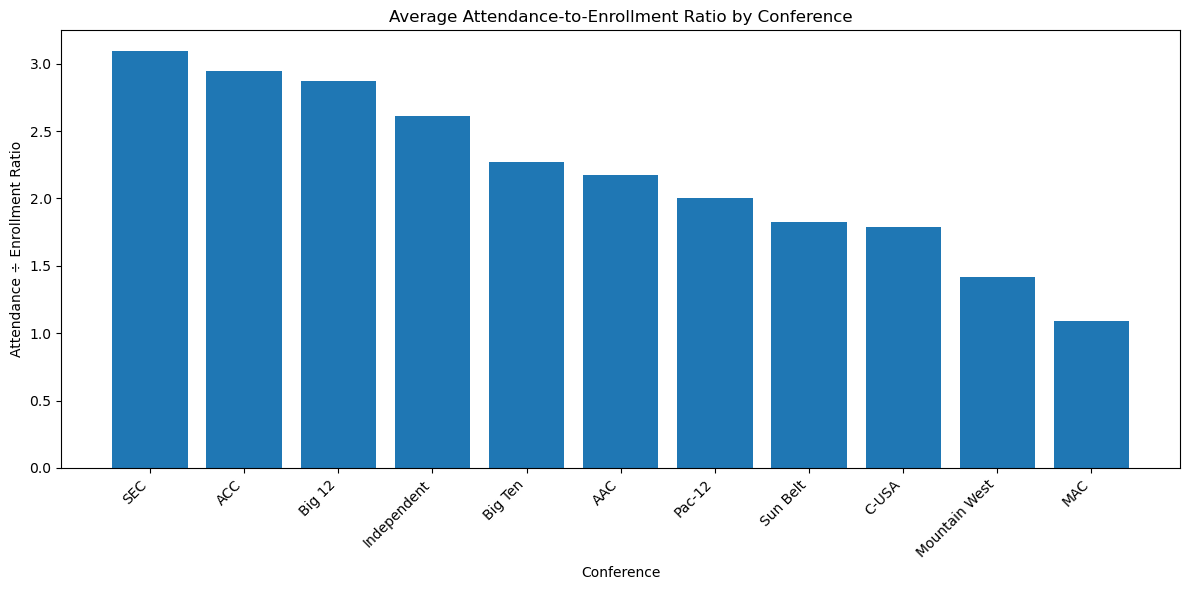

In [5]:
#Loads data
df = pd.read_csv('final_college_cleaned.csv')

#Creates ratio
df["attendance_enrollment_ratio"] = df["avg_home_attendance"] / df["enrollment_total"]

#Conference-level averages
ratio_by_conf = df.groupby("conference")["attendance_enrollment_ratio"].mean().sort_values(ascending=False)

#Plots ratio
plt.figure(figsize=(12,6))
plt.bar(ratio_by_conf.index, ratio_by_conf.values)
plt.title("Average Attendance-to-Enrollment Ratio by Conference")
plt.xlabel("Conference")
plt.ylabel("Attendance ÷ Enrollment Ratio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
